<a href="https://colab.research.google.com/github/BuiLamPhong/Homework_Ai/blob/main/Nhandangcamxuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


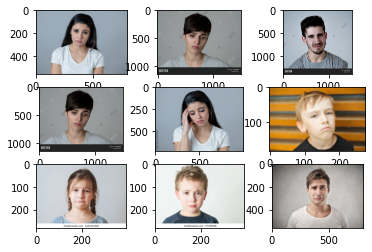

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/gdrive/MyDrive/Colab Notebooks/emotion/emotion/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'buon' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [22]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder =  '/content/gdrive/MyDrive/Colab Notebooks/emotion/emotion/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('buon'):
    output = 0.0
  elif file.startswith('ghetom'):
    output = 1.0
  elif file.startswith('giandu'):
    output = 2.0
  elif file.startswith('giandu'):
    output = 3.0
  elif file.startswith('hanhphuc'):
    output = 4.0
  elif file.startswith('ngacnhien'):
    output = 5.0
  elif file.startswith('sohai'):
    output = 6.0
  photo = load_img(folder + file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('6_emotions.npy', photos)
save('6_emotions.npy', labels)

(69, 150, 150, 3) (69,)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.save('Emotions_model.h5')
classes = ["buon", "ghetom","giandu","hanhphuc", "ngacnhien", "sohai"]

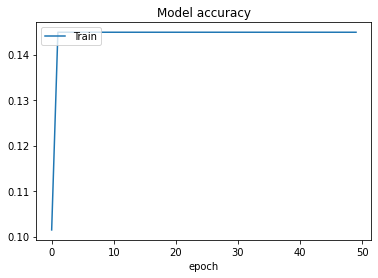

In [32]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from google colab file
upload = ()

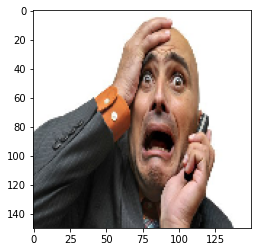

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/gdrive/MyDrive/Colab Notebooks/emotion/emotion/sohai4.jpg', target_size=(150,150))
plt.imshow(img)

In [33]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

[[0.20047086 0.19453771 0.11225296 0.21238759 0.1271757  0.15317516]]
[3]
hanhphuc
